In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
from math import cos, sin, exp, sqrt
import matplotlib.pyplot as plt
from pathlib import Path
import matplotlib.ticker as ticker
from scipy.integrate import simps
from decimal import *

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

import re
import seaborn as sns
sns.set_style('darkgrid')

In [5]:
def springEquation(t):
    return 1 * exp( -(100/(2 * 70)) * t) * cos( sqrt((10**4 / 70) - (100**2 / (4 * 70**2)) ) * t)

def getSolution(tiempos):
    rx = np.vectorize(springEquation)(tiempos)
    df = pd.DataFrame({"time": tiempos, "rx": rx})
    return df

# def mse(A , B):
#     A = A * (10**10)
#     B = B * (10**10)
#     resta = A-B
#     promedio = sum((resta)**2) / len(resta)
#     return Decimal(promedio) / (Decimal(10**20))

def mse(actual, predicted):
    actual = np.array(actual)
    predicted = np.array(predicted)
    differences = np.subtract(actual, predicted)
    squared_differences = np.square(differences)
    return squared_differences.mean()

def get_solver_name(path):
     stem = path.stem
     return stem.split("_")[0]

def get_simulation_data(df):
     times = df.index
     dt = times[1] - times[0]
     return {
          "df": df,
          "dt": dt
     }

def decimal_from_value(value):
    return Decimal(value)

In [273]:
BASE_PATH = '../tp4/out/spring/csv/'
euler = pd.read_csv(f"{BASE_PATH}/EulerSimpleSolver_dt1.0e-02.csv", delimiter=",")
verlet = pd.read_csv(f"{BASE_PATH}/VerletOriginalSolver_dt1.0e-02.csv", delimiter=",")
beeman = pd.read_csv(f"{BASE_PATH}/BeemanSolver_dt1.0e-02.csv", delimiter=",")
gear = pd.read_csv(f"{BASE_PATH}/GearPredictorOrder5_dt1.0e-02.csv", delimiter=",")
solvers = [euler, verlet, beeman, gear]
euler

,step,time,id,rx,ry,vx,vy,ax,ay,mass,radius
0,0,0.00,1,1.000000,0,-0.714286,0,-141.836735,0,70,1
1,1,0.01,1,0.985765,0,-2.132653,0,-141.836735,0,70,1
2,2,0.02,1,0.957550,0,-3.510423,0,-137.776968,0,70,1
3,3,0.03,1,0.915857,0,-4.828202,0,-131.777957,0,70,1
4,4,0.04,1,0.861378,0,-6.067595,0,-123.939254,0,70,1
...,...,...,...,...,...,...,...,...,...,...,...
496,496,4.96,1,-0.163309,0,-0.466640,0,23.497739,0,70,1
497,497,4.97,1,-0.166776,0,-0.226674,0,23.996527,0,70,1
498,498,4.98,1,-0.167835,0,0.014815,0,24.148943,0,70,1
499,499,4.99,1,-0.166489,0,0.254368,0,23.955286,0,70,1


In [274]:
solution = getSolution(beeman["time"])
solution

,time,rx
0,0.00,1.000000
1,0.01,0.985824
2,0.02,0.957883
3,0.03,0.916768
4,0.04,0.863248
...,...,...
496,4.96,-0.025208
497,4.97,-0.026529
498,4.98,-0.027454
499,4.99,-0.027978


In [275]:
msee = mse(beeman["rx"], solution["rx"])
solution["rx"].idxmin()

26

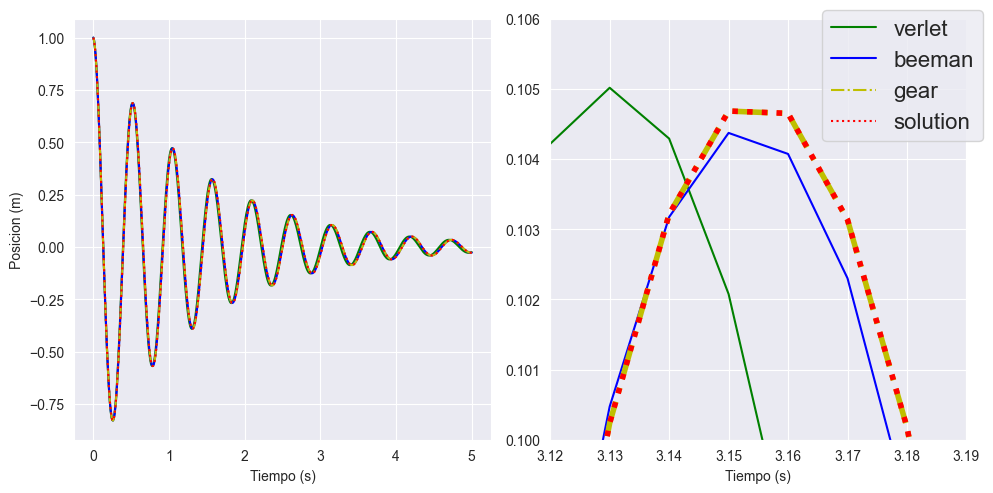

In [276]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(10)
fig.set_figheight(5)
times = gear["time"]
# ax1.plot(times, euler["rx"], '-y', label="euler")
ax1.plot(times, verlet["rx"], '-g', label="verlet")
ax1.plot(times, beeman["rx"], '-b', label="beeman")
ax1.plot(times, gear["rx"], '-.y', label="gear")
ax1.plot(times, solution["rx"], ':r', label="solution")
ax1.set_ylabel("Posicion (m)")
ax1.set_xlabel("Tiempo (s)")
fig.legend(fontsize=16)

x1, x2 = 3.12, 3.19
y1, y2 = 0.10, 0.106

ax2.plot(times, verlet["rx"], '-g', label="verlet")
ax2.plot(times, beeman["rx"], '-b', label="beeman")
ax2.plot(times, gear["rx"], '-.y', linewidth=4 ,label="gear")
ax2.plot(times, solution["rx"], ':r', linewidth=4 ,label="solution")
ax2.set_xlim(x1, x2)
ax2.set_ylim(y1, y2)
ax2.set_xlabel("Tiempo (s)")

# x1, x2 = 3.1545, 3.1546
# y1, y2 = 0.104852, 0.104853
# ax3.plot(times, beeman["rx"], ':b', label="beeman")
# ax3.plot(times, gear["rx"], '--g', label="gear")
# ax3.plot(times, solution["rx"], '-.r', label="solution")
# ax3.set_xlim(x1, x2)
# ax3.set_ylim(y1, y2)

fig.tight_layout()
fig.savefig("./positionVsTimefinal")

In [228]:
errors = [mse(solver["rx"], getSolution(solver["time"])["rx"]) for solver in solvers]
errors

[0.02064948014299034,
 0.0005725726524603259,
 3.2893972869637603e-06,
 4.048045197041648e-12]

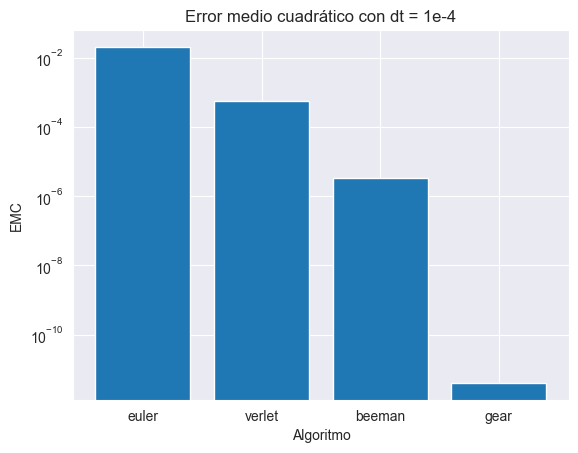

In [253]:
fig, ax = plt.subplots()
methods = ["euler", "verlet", "beeman", "gear"]
ax.bar([1,2,3,4], errors, tick_label=methods, align='center')
ax.set_title('Error medio cuadrático con dt = 1e-4')
ax.set_yscale('log')
ax.set_ylabel("EMC")
ax.set_xlabel("Algoritmo")
fig.savefig("./errorDt1e-4final")

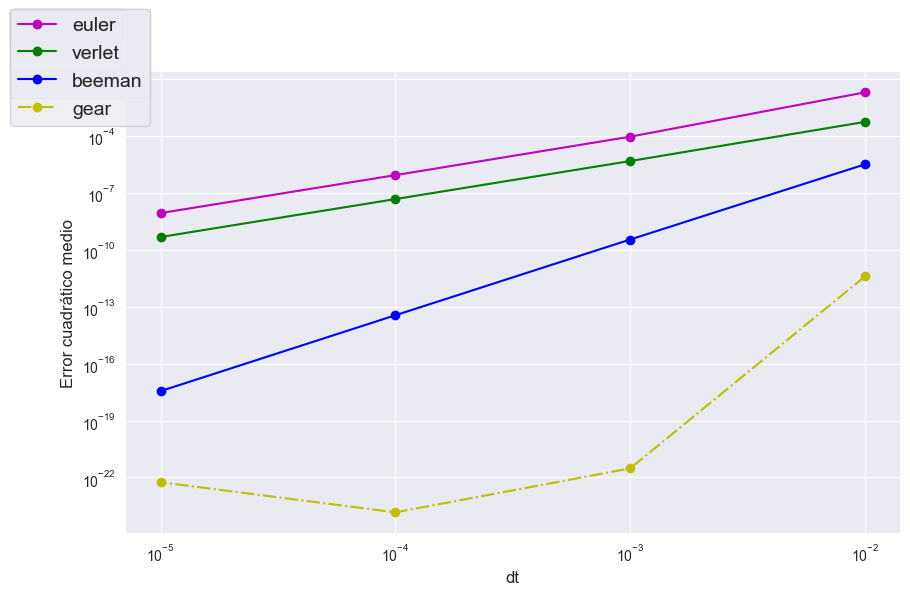

In [270]:
methods = ["euler", "verlet", "beeman", "gear"]
file_names = ["EulerSimpleSolver", "VerletOriginalSolver", "BeemanSolver", "GearPredictorOrder5"]
formats = ['o-m', 'o-g', 'o-b', 'o-.y']

fig, ax = plt.subplots(figsize=[10, 6])
for j, (method,file_name) in enumerate(zip(methods,file_names)): 
    error = []
    dt = [1e-2, 1e-3, 1e-4,1e-5]
    for i in range(2,6):
        solver = pd.read_csv(f"{BASE_PATH}/{file_name}_dt1.0e-0{i}.csv", delimiter=",")
        solution = getSolution(solver["time"])
        error.append(mse(solver["rx"], solution["rx"]))
    ax.loglog(dt,error,formats[j], label=method)
    ax.set_xlabel("dt", fontsize=12)
    ax.set_ylabel("Error cuadrático medio", fontsize=12)
    fig.legend(fontsize=14, loc=2)
plt.savefig("errorVsDtfinal.png")